# Example 4: Testing PyMC3

## PyMC3 simple example

In [1]:
import pymc3 as pm

In [2]:
from pymc3 import Exponential, StudentT, Deterministic
from pymc3.math import exp
from pymc3.distributions.timeseries import GaussianRandomWalk

from pymc3 import Model, Normal, HalfNormal

basic_model = Model()

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize random number generator
np.random.seed(123)

# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

In [4]:
plt.hist(Y)

(array([  3.,  11.,   8.,  17.,  18.,  18.,  15.,   5.,   3.,   2.]),
 array([-2.42854948, -1.69005152, -0.95155356, -0.2130556 ,  0.52544236,
         1.26394032,  2.00243829,  2.74093625,  3.47943421,  4.21793217,
         4.95643013]),
 <a list of 10 Patch objects>)

In [5]:
with basic_model:

    # Priors for unknown model parameters
    alpha = Normal('alpha', mu=0, sd=10)
    beta = Normal('beta', mu=0, sd=10, shape=2)
    sigma = HalfNormal('sigma', sd=1)

    # Expected value of outcome
    mu = alpha + beta[0]*X1 + beta[1]*X2

    # Likelihood (sampling distribution) of observations
    Y_obs = Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

Applied log-transform to sigma and added transformed sigma_log_ to model.


In [6]:
from pymc3 import find_MAP
map_estimate = find_MAP(model=basic_model)

print(map_estimate)

{'beta': array([ 0.948486  ,  2.60705513]), 'sigma_log_': array(-0.03278146854842075), 'alpha': array(0.9065985664354854)}


In [7]:
from scipy import optimize

map_estimate = find_MAP(model=basic_model, fmin=optimize.fmin_powell)

print(map_estimate)

{'beta': array([ 0.95140146,  2.61437458]), 'sigma_log_': array(-0.030009775203107374), 'alpha': array(0.9090521898979702)}


In [8]:
from pymc3 import sample
with basic_model:
     trace = sample(2000)

Assigned NUTS to alpha
Assigned NUTS to beta
Assigned NUTS to sigma_log_
 [-----------------100%-----------------] 2000 of 2000 complete in 3.8 sec

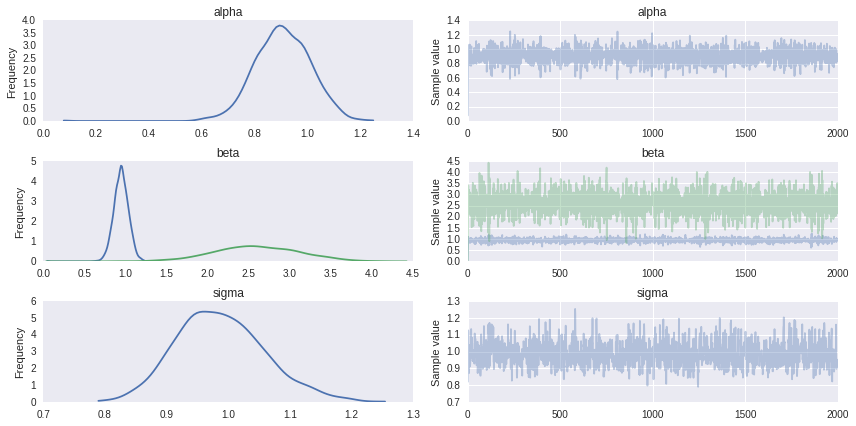

In [10]:
from pymc3 import traceplot

traceplot(trace);

## GeMpy

In [1]:
# Importing and data
import theano.tensor as T
import sys, os
sys.path.append("../GeMpy")

# Importing GeMpy modules
import GeMpy

# Reloading (only for development purposes)
import importlib
importlib.reload(GeMpy)

# Usuful packages
import numpy as np
import pandas as pn

import matplotlib.pyplot as plt

# This was to choose the gpu
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

# Default options of printin
np.set_printoptions(precision = 6, linewidth= 130, suppress =  True)

%matplotlib inline
#%matplotlib notebook



# Setting the extent
geo_data = GeMpy.import_data([0,10,0,10,0,10])


# =========================
# DATA GENERATION IN PYTHON
# =========================
# Layers coordinates
layer_1 = np.array([[0.5,4,7], [2,4,6.5], [4,4,7], [5,4,6]])#-np.array([5,5,4]))/8+0.5
layer_2 = np.array([[3,4,5], [6,4,4],[8,4,4], [7,4,3], [1,4,6]])
layers = np.asarray([layer_1,layer_2])

# Foliations coordinates
dip_pos_1 = np.array([7,4,7])#- np.array([5,5,4]))/8+0.5
dip_pos_2 = np.array([2.,4,4])

# Dips
dip_angle_1 = float(15)
dip_angle_2 = float(340)
dips_angles = np.asarray([dip_angle_1, dip_angle_2], dtype="float64")

# Azimuths
azimuths = np.asarray([90,90], dtype="float64")

# Polarity
polarity = np.asarray([1,1], dtype="float64")

# Setting foliations and interfaces values
GeMpy.set_interfaces(geo_data, pn.DataFrame(
    data = {"X" :np.append(layer_1[:, 0],layer_2[:,0]),
            "Y" :np.append(layer_1[:, 1],layer_2[:,1]),
            "Z" :np.append(layer_1[:, 2],layer_2[:,2]),
            "formation" : np.append(
               np.tile("Layer 1", len(layer_1)), 
               np.tile("Layer 2", len(layer_2))),
            "labels" : [r'${\bf{x}}_{\alpha \, 0}^1$',
               r'${\bf{x}}_{\alpha \, 1}^1$',
               r'${\bf{x}}_{\alpha \, 2}^1$',
               r'${\bf{x}}_{\alpha \, 3}^1$',
               r'${\bf{x}}_{\alpha \, 0}^2$',
               r'${\bf{x}}_{\alpha \, 1}^2$',
               r'${\bf{x}}_{\alpha \, 2}^2$',
               r'${\bf{x}}_{\alpha \, 3}^2$',
               r'${\bf{x}}_{\alpha \, 4}^2$'] }))

GeMpy.set_foliations(geo_data,  pn.DataFrame(
    data = {"X" :np.append(dip_pos_1[0],dip_pos_2[0]),
            "Y" :np.append(dip_pos_1[ 1],dip_pos_2[1]),
            "Z" :np.append(dip_pos_1[ 2],dip_pos_2[2]),
            "azimuth" : azimuths,
            "dip" : dips_angles,
            "polarity" : polarity,
            "formation" : ["Layer 1", "Layer 2"],
            "labels" : [r'${\bf{x}}_{\beta \,{0}}$',
              r'${\bf{x}}_{\beta \,{1}}$'] })) 



layer_3 = np.array([[2,4,3], [8,4,2], [9,4,3]])
dip_pos_3 = np.array([1,4,1])
dip_angle_3 = float(80)
azimuth_3 = 90
polarity_3 = 1



GeMpy.set_interfaces(geo_data, pn.DataFrame(
    data = {"X" :layer_3[:, 0],
            "Y" :layer_3[:, 1],
            "Z" :layer_3[:, 2],
            "formation" : np.tile("Layer 3", len(layer_3)), 
            "labels" : [  r'${\bf{x}}_{\alpha \, 0}^3$',
                           r'${\bf{x}}_{\alpha \, 1}^3$',
                           r'${\bf{x}}_{\alpha \, 2}^3$'] }), append = True)
GeMpy.get_raw_data(geo_data,"interfaces")

 
GeMpy.set_foliations(geo_data, pn.DataFrame(data = {
                     "X" : dip_pos_3[0],
                     "Y" : dip_pos_3[1],
                     "Z" : dip_pos_3[2],
            
                     "azimuth" : azimuth_3,
                     "dip" : dip_angle_3,
                     "polarity" : polarity_3,
                     "formation" : [ 'Layer 3'],
                     "labels" : r'${\bf{x}}_{\beta \,{2}}$'}), append = True)


GeMpy.set_data_series(geo_data, {'younger': ('Layer 1', 'Layer 2'),
                      'older': 'Layer 3'}, order_series = ['younger', 'older'])

In [2]:
GeMpy.set_interpolator(geo_data, u_grade = 0, compute_potential_field= False, compute_block_model= True)

I am here


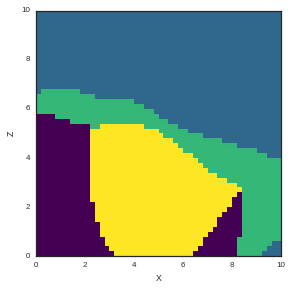

In [3]:
GeMpy.plot_section(geo_data, 13)

In [4]:
geo_data.interpolator.input_parameters

[array([[ 1.,  4.,  1.]]),
 array([ 80.]),
 array([ 90.]),
 array([ 1.]),
 array([[ 8.,  4.,  2.],
        [ 9.,  4.,  3.]]),
 array([[ 2.,  4.,  3.],
        [ 2.,  4.,  3.]]),
 array([3]),
 array([1, 1, 1, ..., 0, 0, 0])]

In [7]:
geo_data.interpolator._data.foliations

,G_x,G_y,G_z,X,Y,Z,azimuth,dip,formation,labels,polarity,series
0,0.258819,1.584810e-17,0.965926,7.0,4.0,7.0,90.0,15.0,Layer 1,"${\bf{x}}_{\beta \,{0}}$",1.0,younger
1,-0.342020,-2.094269e-17,0.939693,2.0,4.0,4.0,90.0,340.0,Layer 2,"${\bf{x}}_{\beta \,{1}}$",1.0,younger
0,0.984808,6.030208e-17,0.173648,1.0,4.0,1.0,90.0,80.0,Layer 3,"${\bf{x}}_{\beta \,{2}}$",1.0,older


In [29]:
pm.Deterministic?

In [17]:
import theanograf 
tg = theanograf.TheanoGraph(u_grade = 0)

/home/bl3/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: DeprecationWarning: stack(*tensors) interface is deprecated, use stack(tensors, axis=0) instead.
  from ipykernel import kernelapp as app


In [34]:
tg.C_matrix.